<a href="https://colab.research.google.com/github/Aarati-neupane/6005AI/blob/main/WEEK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def sumofXW(inputs, weights):
    return inputs.dot(weights)


In [ ]:
def step_function(sum_func):
  if (sum_func >= 1):
    #print(f'The Sum Function is greater than or equal to 1')
    return 1
  else:
        #print(f'The Sum Function is NOT greater than zero')
        return 0

In [ ]:
# for weights = [0.7, 0.1]
import numpy as np
weights = np.array([0.7, 0.1])
inputs = np.array([55, 75])
s_prob1 = sumofXW(inputs, weights)
s_prob1
output=step_function(s_prob1 )
print(output)

1


In [ ]:
weights = np.array([-0.7, -0.1])

In [ ]:
s_prob2 = sumofXW(inputs, weights)
print(s_prob2)
output=step_function(s_prob2 )
print(output)

-46.0
0


In [ ]:
# Decalre a matrix for X1 and X2  having four rows.
import numpy as np
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
#checking the shape of the input matrix
# it is two dimension matrix haing 4 rows and 2 columns.
print(inputs.shape)

(4, 2)


In [ ]:
# create a output y having four rowa
outputs = np.array([0, 0, 0, 1])
#Checking the shape of the outputs
# note it has one row  vector having 4 elements
print(outputs.shape)

(4,)


In [ ]:
# one weight for x1 and one for x2
weights = np.array([0.0, 0.0])
print(weights.shape)

(2,)


In [ ]:
# cacluate the dot product for each instance in the input
# also Note the output  of the preceptron for the given sample. does it perform AND operation?
for i in range(len(inputs)):
  print("sample is", inputs[i] )
  XW=sumofXW(inputs[i], weights)
  print ("sum of product of the first instance is",XW)
  OP=step_function(XW)
  print( "step function output for given sample",OP,"\n")

sample is [0 0]
sum of product of the first instance is 0.0
step function output for given sample 0 

sample is [0 1]
sum of product of the first instance is 0.0
step function output for given sample 0 

sample is [1 0]
sum of product of the first instance is 0.0
step function output for given sample 0 

sample is [1 1]
sum of product of the first instance is 0.0
step function output for given sample 0 



In [ ]:
weights = np.array([0.0, 0.0])

In [ ]:
LR=0.1

def train():
    #

    print("Tweights",weights)

    total_error_value = 1
    # While the total_error_value is not equal to zero. we are asumming that at the start of running our network there will be no zero
    while (total_error_value != 0):
        #making the total_error 0 so we can do other calculations
        total_error_value = 0
        #Looping into each row of the dataset (remember indexing in python starts at zero hence 0-3 which are 4 values)
        for i in range(len(outputs)):
            #Calculating predictions
            XW=sumofXW(inputs[i], weights)
            prediction = step_function(XW)
            # Calculating the absolute value of the error
            error = abs(outputs[i] - prediction)
            print("error",error)
            #Updating the error
            total_error_value  += error

            if error > 0:
                for j in range(len(weights)):
                    #updating the weights for x1 and x2
                    weights[j] = weights[j] + (LR * inputs[i][j] * error)
                    print('Weight updated to: ' + str(weights[j]))
        print('Total error Value: ' + str(total_error_value))

In [ ]:
train()
print(weights)

Tweights [0. 0.]
error 0
error 0
error 0
error 1
Weight updated to: 0.1
Weight updated to: 0.1
Total error Value: 1
error 0
error 0
error 0
error 1
Weight updated to: 0.2
Weight updated to: 0.2
Total error Value: 1
error 0
error 0
error 0
error 1
Weight updated to: 0.30000000000000004
Weight updated to: 0.30000000000000004
Total error Value: 1
error 0
error 0
error 0
error 1
Weight updated to: 0.4
Weight updated to: 0.4
Total error Value: 1
error 0
error 0
error 0
error 1
Weight updated to: 0.5
Weight updated to: 0.5
Total error Value: 1
error 0
error 0
error 0
error 0
Total error Value: 0
[0.5 0.5]


In [ ]:
print(weights)
for i in range(len(inputs)):
  print("sample is", inputs[i] )
  XW=sumofXW(inputs[i], weights)

  OP=step_function(XW)
  print( "step function output for given sample",OP,"\n")

[0.5 0.5]
sample is [0 0]
step function output for given sample 0 

sample is [0 1]
step function output for given sample 0 

sample is [1 0]
step function output for given sample 0 

sample is [1 1]
step function output for given sample 1 



In [ ]:
# Step 1: Imports and helper functions
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to train the Perceptron
def train_perceptron(X_train, y_train, max_iter=1000, random_state=42):
    model = Perceptron(max_iter=max_iter, random_state=random_state)
    model.fit(X_train, y_train)
    return model

# Function to plot decision boundaries (expects X with exactly 2 features)
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()


In [ ]:
# Step 2: Load breast cancer dataset (binary) and prepare first two features
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X_binary = breast_cancer.data
y_binary = breast_cancer.target

# Use only first two features for visualization
X_binary_vis = X_binary[:, :2]

# Quick check
print("Breast cancer shapes:", X_binary_vis.shape, y_binary.shape)
print("Target names:", breast_cancer.target_names)


Breast cancer shapes: (569, 2) (569,)
Target names: ['malignant' 'benign']


In [ ]:
# Step 3: Split into train/test for breast cancer (20% test)
from sklearn.model_selection import train_test_split

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary_vis, y_binary, test_size=0.2, random_state=42
)

print("Train shape:", X_train_binary.shape, "Test shape:", X_test_binary.shape)


Train shape: (455, 2) Test shape: (114, 2)


In [ ]:
# Step 4: Train Perceptron on breast cancer training data
perceptron_binary = train_perceptron(X_train_binary, y_train_binary)
print("Perceptron (binary) trained.")


Perceptron (binary) trained.


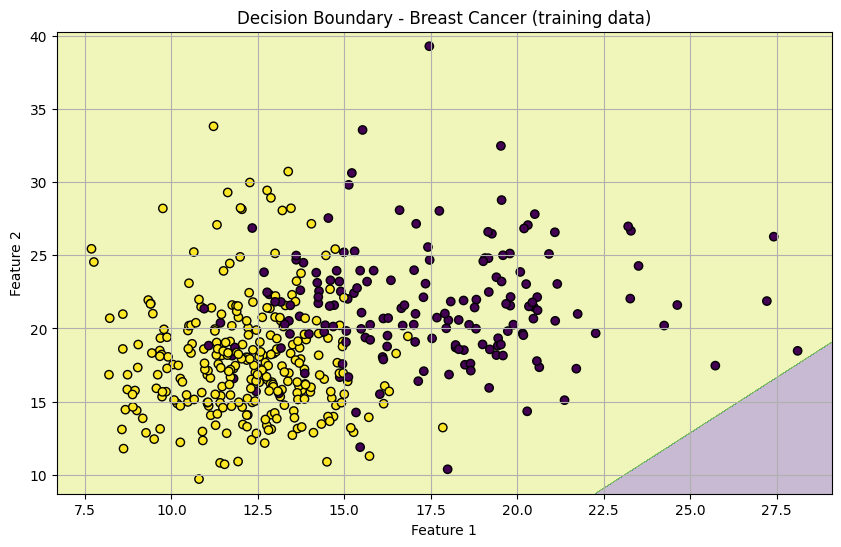

Binary Test Accuracy: 0.623

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


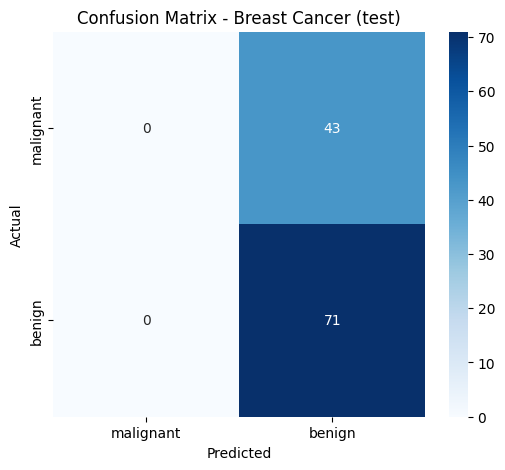

In [ ]:
# Step 5: Plot decision boundary and evaluate on test set (breast cancer)
plot_decision_boundaries(X_train_binary, y_train_binary, perceptron_binary,
                         "Decision Boundary - Breast Cancer (training data)")

y_pred_binary = perceptron_binary.predict(X_test_binary)
print(f"Binary Test Accuracy: {accuracy_score(y_test_binary, y_pred_binary):.3f}\n")
print("Classification Report:\n", classification_report(y_test_binary, y_pred_binary))

conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_binary, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names,
            yticklabels=breast_cancer.target_names)
plt.title("Confusion Matrix - Breast Cancer (test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Step 6: Load wine dataset and prepare first two features
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Use only first two features for visualization
X_wine_vis = X_wine[:, :2]

# Quick check
print("Wine shapes:", X_wine_vis.shape, y_wine.shape)
print("Wine target names:", wine.target_names)


Wine shapes: (178, 2) (178,)
Wine target names: ['class_0' 'class_1' 'class_2']


In [ ]:
# Step 7: Split into train/test for wine (20% test)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine_vis, y_wine, test_size=0.2, random_state=42
)

print("Wine train shape:", X_train_wine.shape, "Wine test shape:", X_test_wine.shape)


Wine train shape: (142, 2) Wine test shape: (36, 2)


In [ ]:
# Step 8: Train Perceptron on wine training data
perceptron_wine = train_perceptron(X_train_wine, y_train_wine)
print("Perceptron (wine) trained.")


Perceptron (wine) trained.


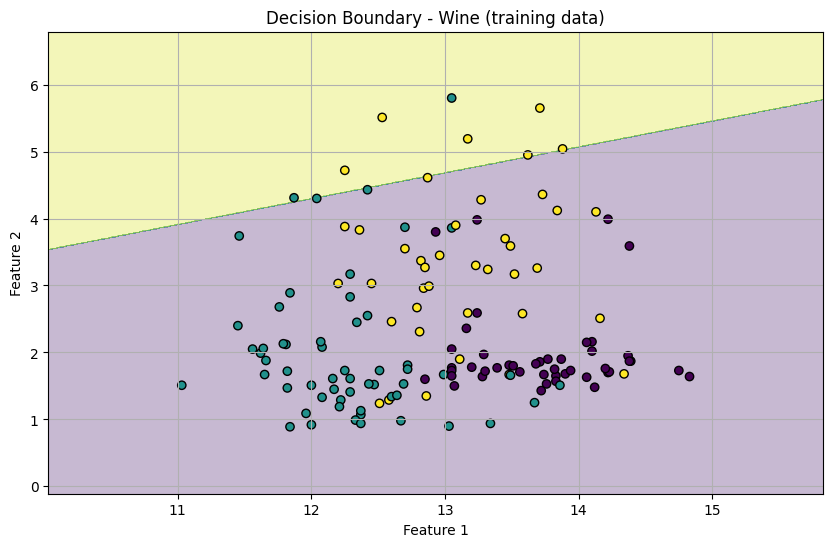

Wine Test Accuracy: 0.389

Classification Report:
               precision    recall  f1-score   support

           0       0.39      1.00      0.56        14
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         8

    accuracy                           0.39        36
   macro avg       0.13      0.33      0.19        36
weighted avg       0.15      0.39      0.22        36



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


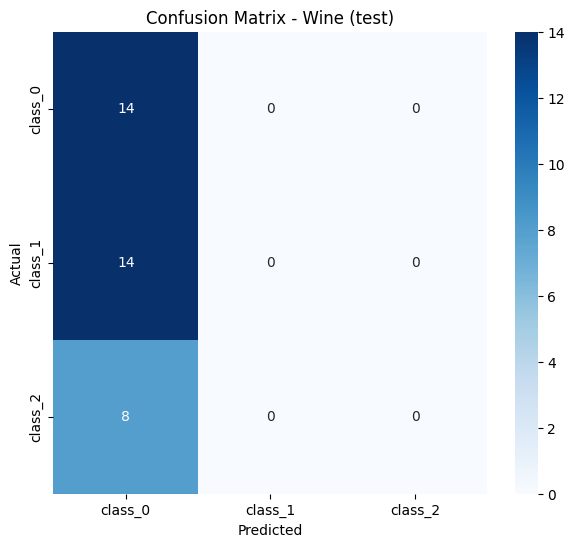

In [ ]:
# Step 9: Plot decision boundary and evaluate on test set (wine)
plot_decision_boundaries(X_train_wine, y_train_wine, perceptron_wine,
                         "Decision Boundary - Wine (training data)")

y_pred_wine = perceptron_wine.predict(X_test_wine)
print(f"Wine Test Accuracy: {accuracy_score(y_test_wine, y_pred_wine):.3f}\n")
print("Classification Report:\n", classification_report(y_test_wine, y_pred_wine))

conf_matrix_wine = confusion_matrix(y_test_wine, y_pred_wine)
plt.figure(figsize=(7,6))
sns.heatmap(conf_matrix_wine, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title("Confusion Matrix - Wine (test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df =pd.read_csv('Diabetes_ANN.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,174.2,55.0,35.3,7.4,27.4,0.200,22.2,1
1,0.0,127.9,47.9,39.7,238.8,36.3,0.300,42.8,0
2,10.1,82.6,81.3,6.1,70.0,34.1,0.700,27.3,1
3,6.0,96.0,35.9,15.3,209.5,25.0,0.078,37.0,1
4,3.4,135.9,89.3,24.5,63.0,34.1,0.400,29.6,1


In [ ]:
# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled.shape[1]

8

In [ ]:

# Build the ANN model
model = Sequential([

 Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')

   ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

plt.figure(figsize=(12, 5))


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4864 - loss: 0.9391 - val_accuracy: 0.6637 - val_loss: 0.8103
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6403 - loss: 0.7979 - val_accuracy: 0.6775 - val_loss: 0.7524
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6459 - loss: 0.7622 - val_accuracy: 0.6775 - val_loss: 0.7164
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6568 - loss: 0.7263 - val_accuracy: 0.6775 - val_loss: 0.6927
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6587 - loss: 0.6975 - val_accuracy: 0.6775 - val_loss: 0.6747
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6695 - loss: 0.6778 - val_accuracy: 0.6775 - val_loss: 0.6626
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6472 - loss: 0.6784 - val_accuracy: 0.6775 - val_loss: 0.6527
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6610 - loss: 0.6596 - val_accu

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       341
           1       0.66      1.00      0.79       659

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.43      0.66      0.52      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[  0 341]
 [  0 659]]
